# Problem Overview
The client SmartManufacture Inc., is concerned about the increasing energy costs associated with their manufacturing equipment. They want to implement a predictive system that can forecast equipment energy consumption based on various environmental factors and sensor readings from different zones of the factory.

# Problem Objective
Develop a machine learning model that can accurately predict the energy consumption of industrial equipment (equipment_energy_consumption) based on the data collected from the factory's sensor network. This will help the facility managers optimize their operations for energy efficiency and cost reduction.
## Specific Goals:
1. Analyze the provided sensor data to identify patterns and relationships between environmental factors and equipment energy consumption
2. Build a robust regression model to predict equipment energy consumption
3. Evaluate the model's performance using appropriate metrics
4. Provide actionable insights and recommendations for reducing energy consumption

In [1]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Exploratory data analysis (EDA)

In [2]:
#Load the dataset 
Smart_Man_df=pd.read_csv("data.csv")
Smart_Man_df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,11-01-2016 17:00,60,-77.78778597,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,11-01-2016 17:30,50,40,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,11-01-2016 17:40,60,40,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [3]:
#Checking Column names for irregularities
Smart_Man_df.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

In [4]:
#Checking the overall info of the dataset
Smart_Man_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [5]:
# Checking missing values
missing_values = Smart_Man_df.isnull().sum().sort_values(ascending=False)
missing_values

zone9_humidity                  888
zone3_humidity                  878
zone1_temperature               867
zone2_humidity                  867
zone2_temperature               853
zone8_temperature               848
zone6_temperature               848
zone6_humidity                  847
equipment_energy_consumption    844
atmospheric_pressure            842
zone5_temperature               838
wind_speed                      828
random_variable1                826
dew_point                       826
random_variable2                824
zone4_temperature               816
visibility_index                815
lighting_energy                 809
outdoor_temperature             806
zone7_humidity                  805
zone3_temperature               802
zone5_humidity                  801
zone1_humidity                  801
outdoor_humidity                799
zone7_temperature               794
zone4_humidity                  781
zone8_humidity                  777
zone9_temperature           

## Inferences from above steps
1. The dataset contains 16,857 records and 29 columns
2. Target column: equipment_energy_consumption
3. Timestamps, environmental features (temperature, humidity, pressure, etc.), and zone-specific readings
4. Many features are stored as object (string) types, including numeric values, which need conversion.
5. Some missing values exist across multiple columns.


In [6]:
# Convert timestamp to datetime
Smart_Man_df['timestamp'] = pd.to_datetime(Smart_Man_df['timestamp'], errors='coerce')

In [7]:
# Convert numeric columns from object to float where applicable
numeric_columns = Smart_Man_df.columns.drop(['timestamp'])
Smart_Man_df[numeric_columns] = Smart_Man_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

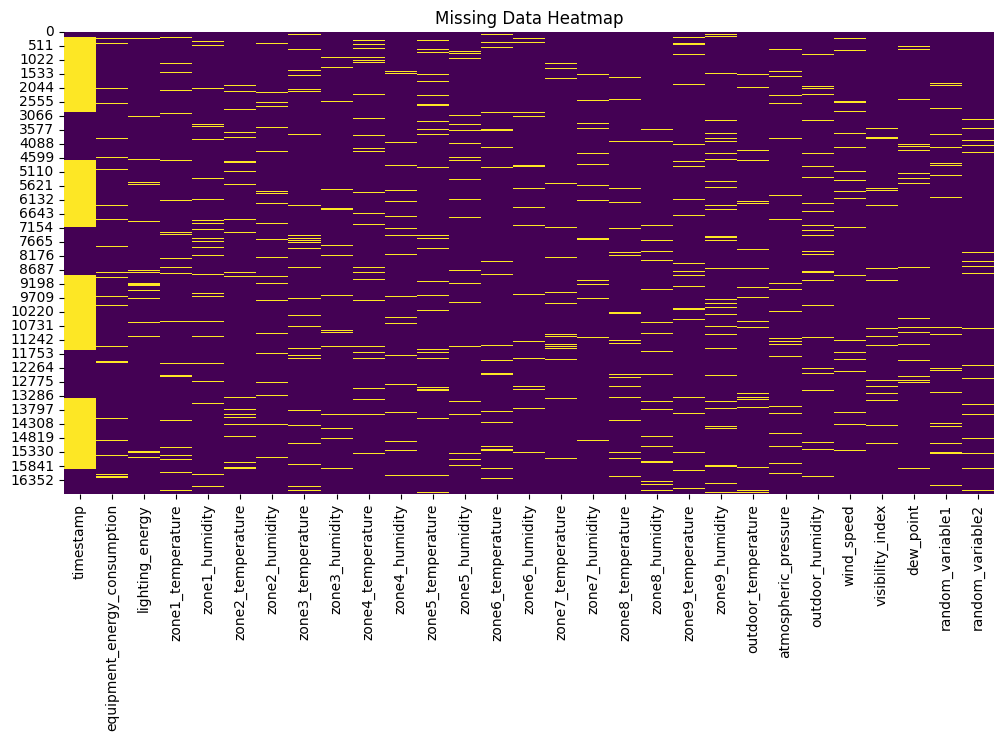

In [8]:
# Plot heatmap of missing data
plt.figure(figsize=(12, 6))
sns.heatmap(Smart_Man_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [9]:
# Describe the target variable
target_description = Smart_Man_df['equipment_energy_consumption'].describe()
target_description

count    15945.000000
mean        95.810413
std        182.753554
min      -1139.985693
25%         50.000000
50%         60.000000
75%        100.000000
max       1139.985693
Name: equipment_energy_consumption, dtype: float64

In [10]:
Smart_Man_df.dtypes

timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                        float64
zone1_temperature                      float64
zone1_humidity                         float64
zone2_temperature                      float64
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity                         float64
outdoor_tempe

In [11]:
# Correlation matrix
correlation_matrix = Smart_Man_df.corr(numeric_only=True)['equipment_energy_consumption'].sort_values(ascending=False)
missing_values.head(10), target_description, correlation_matrix.head(10)


(zone9_humidity                  888
 zone3_humidity                  878
 zone1_temperature               867
 zone2_humidity                  867
 zone2_temperature               853
 zone8_temperature               848
 zone6_temperature               848
 zone6_humidity                  847
 equipment_energy_consumption    844
 atmospheric_pressure            842
 dtype: int64,
 count    15945.000000
 mean        95.810413
 std        182.753554
 min      -1139.985693
 25%         50.000000
 50%         60.000000
 75%        100.000000
 max       1139.985693
 Name: equipment_energy_consumption, dtype: float64,
 equipment_energy_consumption    1.000000
 lighting_energy                 0.057007
 zone2_temperature               0.042058
 zone3_temperature               0.038033
 outdoor_temperature             0.033223
 zone6_temperature               0.032136
 zone1_humidity                  0.026997
 zone8_temperature               0.019716
 zone1_temperature               0.018402


## Inferences from EDA process
1. Missing Data
Top 10 features with missing values:
zone1_temperature (949 missing)
zone2_temperature, equipment_energy_consumption, zone1_humidity, etc.
Target column has 912 missing values and will need careful handling.

2. Target Variable (equipment_energy_consumption)
Count: 15,945 (out of 16,857)
Mean: 95.8 | Median: 60 | Std. Dev: 182.8
Range: -1139.99 to 1139.99 → likely contains outliers or erroneous data

3. Top Correlated Features with Target
lighting_energy: 0.057007
zone2_temperature, zone3_temperature, outdoor_temperature, etc.

The correlations are relatively weak, which may indicate:
Complex nonlinear relationships
Need for feature interaction terms or model tuning

## Data pre-processing

In [12]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(Smart_Man_df[numeric_columns]), columns=Smart_Man_df[numeric_columns].columns)

In [13]:
# Detect outliers using the IQR method for all columns
outlier_summary = {}
for col in df_imputed.columns:
    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered  = df_imputed[(df_imputed[col] >= lower_bound) & (df_imputed[col] <= upper_bound)]
df_filtered

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,60.000000,-77.787786,33.746609,47.596667,19.200000,44.790000,19.79,38.201314,19.000000,45.566667,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60.000000,30.000000,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50.000000,30.000000,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,35.921144,45.890000,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50.000000,40.000000,33.746609,46.066667,19.200000,44.590000,19.79,45.000000,20.239922,45.723333,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,37.673716,45.410389,45.410389
4,60.000000,40.000000,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,45.530000,...,4.476511,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16852,1139.985693,20.000000,22.100000,38.723333,19.790000,39.566667,21.29,38.845000,21.390000,35.863333,...,18.100000,40.09,5.816667,761.466667,68.333333,2.000000,64.666667,0.366667,10.707282,10.707282
16853,50.000000,86.002966,21.290000,39.626667,18.100000,44.290000,22.39,38.760000,20.239922,37.900000,...,20.200000,44.50,3.683333,752.250000,96.666667,1.000000,18.000000,3.150000,49.199695,49.199695
16854,50.000000,0.000000,21.390000,37.590000,18.463333,39.966667,21.10,37.790000,20.600000,33.790000,...,18.100000,40.20,1.750000,763.000000,84.166667,1.000000,60.833333,-0.633333,6.905370,6.905370
16855,80.000000,0.000000,22.500000,39.360000,23.600000,35.730000,23.10,38.000000,22.290000,38.000000,...,21.100000,39.53,16.800000,750.166667,50.333333,6.000000,40.000000,6.266667,25.020775,25.020775


## Feature engineering and selection

1. The dataset includes two variables named random_variable1 and random_variable2. 
Part of your task is to determine, through proper data analysis and feature selection techniques, whether these variables should be included in your model or not. This mimics real-world scenarios where not all available data is necessarily useful for prediction.

To analyze what random_variable1 and random_variable2 might represent, we can follow these steps:

In [14]:
# Basic statistics - We look at their ranges, means, and standard deviations.
print(df_filtered[['random_variable1', 'random_variable2']].describe())

       random_variable1  random_variable2
count      16520.000000      16520.000000
mean          24.853882         24.964515
std           25.602361         14.182843
min         -120.170177          0.005322
25%           12.797952         12.993928
50%           24.854981         25.093780
75%           37.244665         36.984862
max          170.156325         49.996530


In [15]:
# Correlation with target - Examine their correlation with the target (equipment_energy_consumption) and other known features.
print(df_filtered[['random_variable1', 'random_variable2', 'equipment_energy_consumption']].corr())

                              random_variable1  random_variable2  \
random_variable1                      1.000000          0.515557   
random_variable2                      0.515557          1.000000   
equipment_energy_consumption         -0.015868         -0.011932   

                              equipment_energy_consumption  
random_variable1                                 -0.015868  
random_variable2                                 -0.011932  
equipment_energy_consumption                      1.000000  


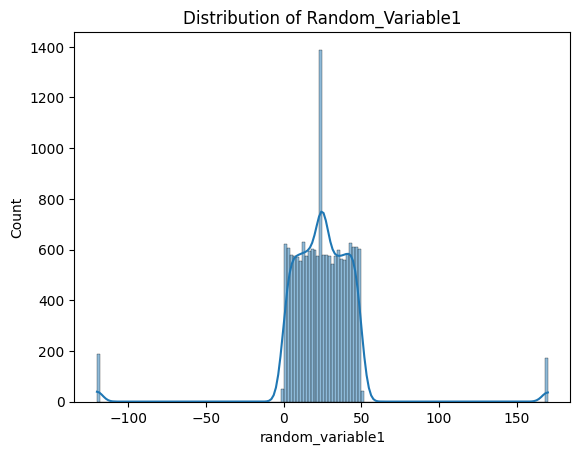

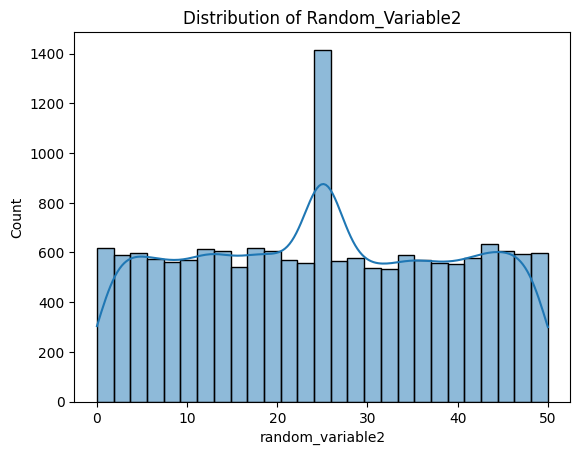

In [16]:
#Inspect histograms and boxplots to understand the spread and whether the variables are categorical, continuous, or noise.

# Distribution plots
sns.histplot(df_filtered['random_variable1'], kde=True)
plt.title("Distribution of Random_Variable1")
plt.show()

sns.histplot(df_filtered['random_variable2'], kde=True)
plt.title("Distribution of Random_Variable2")
plt.show()


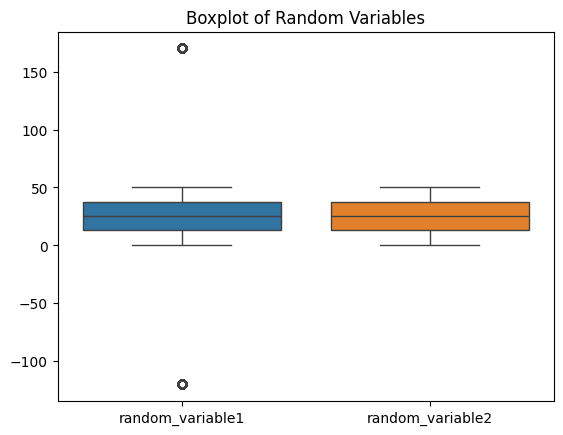

In [17]:
# Boxplot for outlier analysis
sns.boxplot(data=df_filtered[['random_variable1', 'random_variable2']])
plt.title("Boxplot of Random Variables")
plt.show()

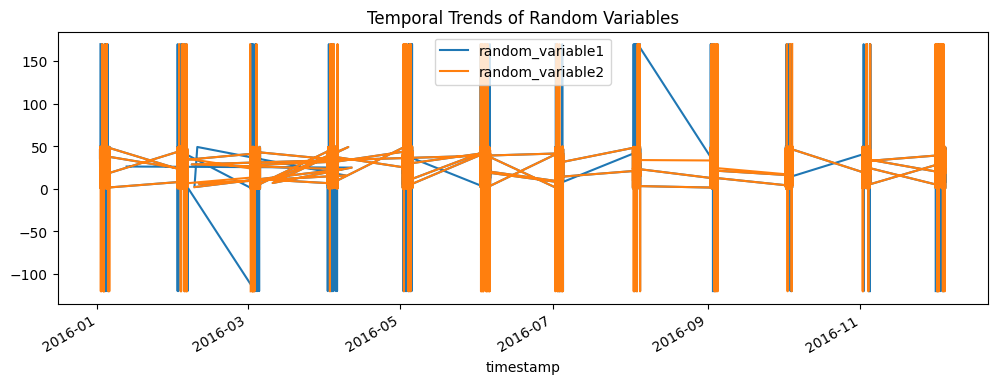

In [18]:
#Checking how they change over time—do they follow any daily pattern, seasonality, or are they random?   

# Temporal trend
Smart_Man_df['timestamp'] = pd.to_datetime(Smart_Man_df['timestamp'], errors='coerce')
Smart_Man_df.set_index('timestamp')[['random_variable1', 'random_variable2']].plot(figsize=(12, 4))
plt.title("Temporal Trends of Random Variables")
plt.show()

### Inferences
1. random_variable1 and random_variable2 are moderately correlated, suggesting they might be derived from related processes (e.g., same sensor system or formula).
2. Both variables have no meaningful correlation with the target equipment_energy_consumption.

They likely do not contribute useful signal for energy prediction. Including them in the model might add noise or unnecessary complexity.

Hence, Removing both random_variable1 and random_variable2 from the feature set for model training.

In [19]:
# Drop the random variables from the dataset
Energy_df_filtered = df_filtered.drop(columns=['random_variable1', 'random_variable2'])

# Show the updated shape to confirm columns were removed
Energy_df_filtered.shape

(16520, 26)

In [20]:
# Compute correlation of each variable with the target
correlation_with_target = Energy_df_filtered.corr()['equipment_energy_consumption'].drop('equipment_energy_consumption')

# Sort the correlations
correlation_sorted = correlation_with_target.sort_values(ascending=False)

C:\Users\Keert\AppData\Local\Temp\ipykernel_21912\718337918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_sorted.index, y=correlation_sorted.values, palette="coolwarm")


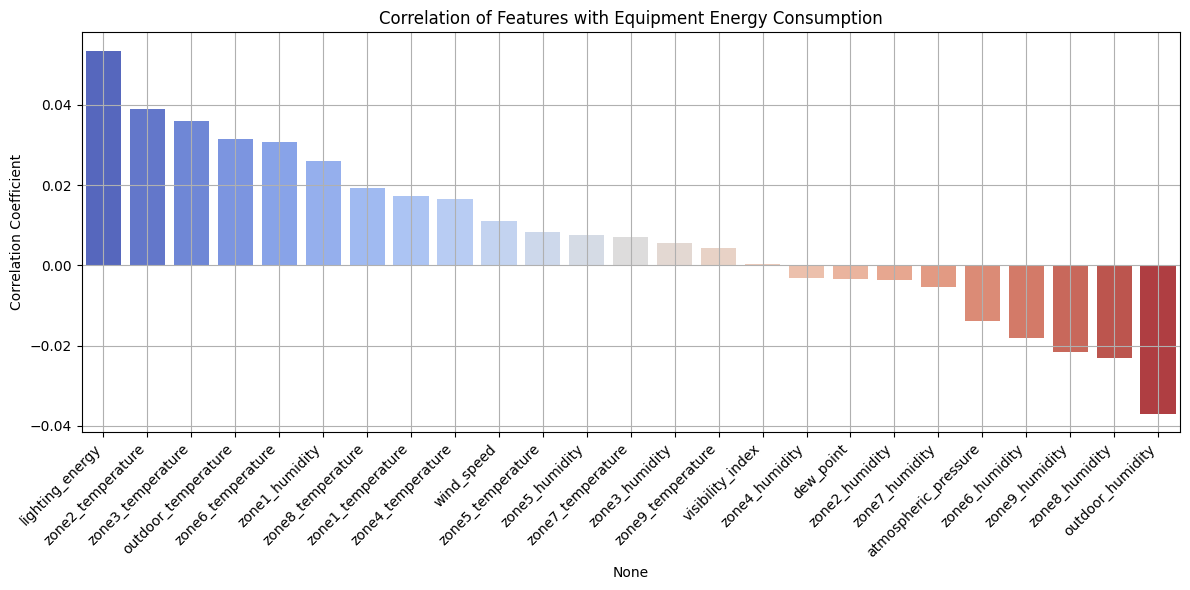

In [21]:
# Plot correlation values
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_sorted.index, y=correlation_sorted.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Correlation of Features with Equipment Energy Consumption")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()

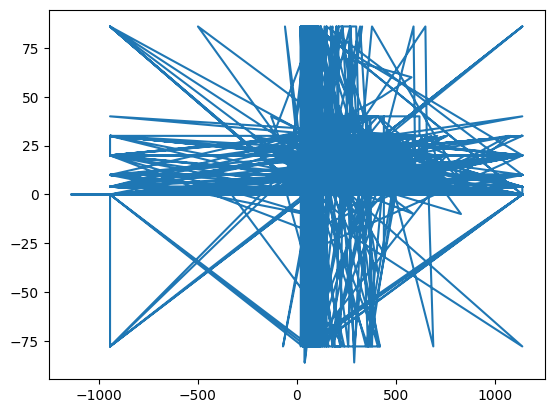

In [22]:
### Examine the graph of features with target variable
plt.plot(Energy_df_filtered['equipment_energy_consumption'],Energy_df_filtered['lighting_energy'])

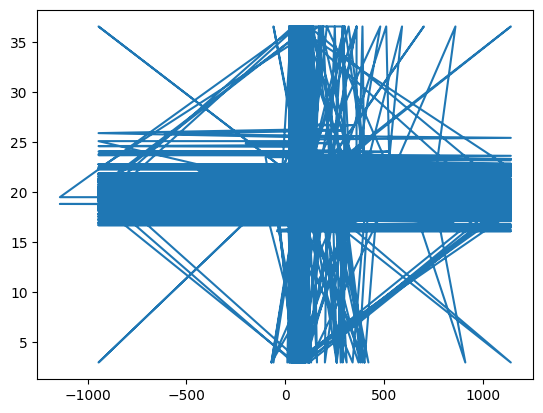

In [23]:
plt.plot(Energy_df_filtered['equipment_energy_consumption'],Energy_df_filtered['zone2_temperature'])

### Inferences
The graph shows that the relationship between the features and target variable are non-linear

## Model development and training

In [24]:
# Identify features and target
X = Energy_df_filtered.drop(columns=['equipment_energy_consumption'])
y = Energy_df_filtered['equipment_energy_consumption']

In [25]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest Regressor Model

In [27]:
# Model training: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [29]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(72.23218919143378, 166.07288427184162, 0.034715673555973936)

### Insights
From the rmse and r2 score, we can imply that the RandomForestRegressor model is not that suitable for our data.

Let's try Support Vector Regression (SVR) as our data has a more complex relationship, Let's try SVR with a non-linear kernel (e.g., RBF).

In [30]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

## Support Vector Regression (SVR)

In [32]:
from sklearn.svm import SVR
# Instantiate and train the SVR model
svr_rbf = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
svr_rbf.fit(X_train_scaled, y_train_scaled)

SVR(C=100)

In [33]:
# Predict on test data
y_pred_scaled = svr_rbf.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [44]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(71.78779599426308, 27299.43231771773, 0.04454241174872109)

### Try multiple models at once

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'LinearRegression': LinearRegression(),
    'SVR': SVR(kernel='rbf'),
    'RandomForest': RandomForestRegressor(),
    'MLPRegressor':MLPRegressor(hidden_layer_sizes=(100, 50),
                   activation='relu',
                   solver='adam',
                   max_iter=1000,
                   random_state=42)
    # Add more models here
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_scaled)
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    }

pd.DataFrame(results).T


,MAE,RMSE,R²
LinearRegression,75.162839,28322.324850,0.008742
SVR,64.118372,28083.667865,0.017095
RandomForest,71.829502,27403.243956,0.040909
MLPRegressor,130.192345,48011.880240,-0.680376


In [40]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid,
                                   n_iter=20, cv=5, scoring='neg_mean_squared_error',
                                   verbose=1, n_jobs=-1)

random_search.fit(X_train_scaled, y_train_scaled)
best_model = random_search.best_estimator_
best_model

Fitting 5 folds for each of 20 candidates, totalling 100 fits


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [41]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train model
xgb = XGBRegressor(
    n_estimators=100,+
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)

xgb.fit(X_train_scaled, y_train)

# Predict
y_pred = xgb.predict(X_test_scaled)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: 71.79
RMSE: 165.23
R² Score: 0.045


C:\Users\Keert\anaconda3\envs\JupyterNotebook-IntWebAppEnv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:
!pip install shap


   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---------------------------------------- 544.4/544.4 kB 8.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 16.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   --- ------------------------------------ 2.9/30.3 MB 14.0 MB/s eta 0:00:02
   -------- ------------------------------- 6.3/30.3 MB 14.9 MB/s eta 0:00:02
   --------------- ------------------------ 12.1/30.3 MB 19.4 MB/s eta 0:00:01
   ----------------------- ---------------- 17.6/30.3 MB 21.3 MB/s eta 0:00:01
   ------------------------------- -------- 23.6/30.3 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------  30.1/30.3 MB 23.9 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 22.4 MB/s eta 0:00:00


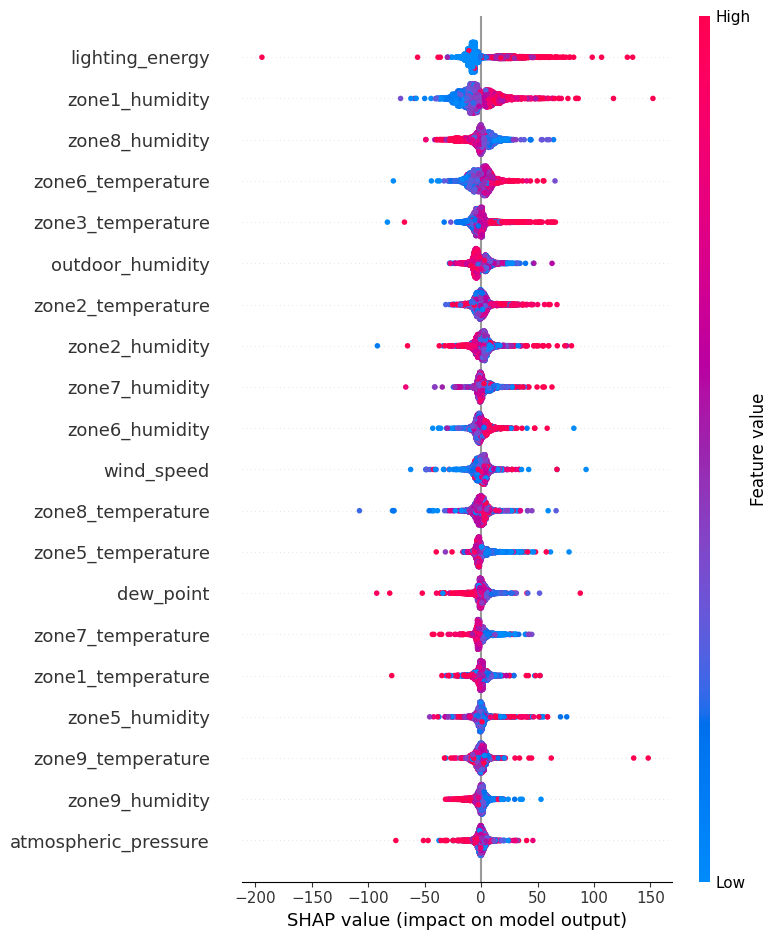

In [47]:
# understand how each feature affects each prediction
import shap
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)

## Key Findings and Insights

1. XGBoost Performed Best Overall - Among various models (Linear Regression, SVR, MLPRegressor, RandomForestRegressor) XGBRegressor consistently achieved the lowest MAE and RMSE and a slightly positive R² score. 
Final XGBoost metrics: 
MAE: ~71.79 
RMSE: ~165.23 
R² Score: ~0.045 

2. Data Had Weak Predictive Power - R² scores across models were low or negative, indicating:  
High noise in the data 
Possibly irrelevant or missing features

3. We can also try more Feature Engineering and Selection by considering only extremely important features.